# Ejercicio Tipo Parcial

El ministerio de salud de la nación les solicita realizar un programa que les permita visualizar el estado de ciudadanos infectados con COVID-19 en todas sus variantes en un rango de fecha determinado y comparar esos resultados con los niveles de vacunación.
A su vez, se les solicita que realicen una compración con otro(s) país(es). (Seleccionar como máximo 2 adicionales)

Para ello, un analista le provee los siguientes archivos.

[Vacunación Global](https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/country_vaccinations.csv)

[Casos COVID Global](https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/owid-covid-data.csv)


Consideraciones:

* Rango de Fechas desde 01/01/2021 a 15/01/2021
* Importar los archivos y trabajarlos como diccionarios o dataframes. El caracter delimitador de los archivos es el **';'**
* Realizar al menos 4 charts que representen la información solicitada
* Utilizar funciones
* Generar un archivo que posea la siguiente estructura de datos dscriminado por el rango de fechas.
```
ID:{
'país':value,
'fecha':value,
'nuevos_casos':value,
'nuevas_muertes':value,
'total_vacunados':value
}
```
* Documentar cada paso con bloques de texto adicionalmente a notas en el código
* Presentar por pantalla el total acumulado de infectados y de vacunados en el rango de fechas solicitado
* Proveer una breve conclusión como parte del análisis 





## TIPS

In [69]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
file = ('./sample_data/country_vaccinations.csv')
covid_vaccines={}

with open(file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file,delimiter=';') #Delimitador ;
    line_count = 0
    for row in csv_reader:
      print(row)

In [ ]:
import csv
file = ('./sample_data/owid-covid-data.csv')
#file = ('https://github.com/al34n1x/DataScience/tree/master/100.Examen/2022/owid-covid-data.csv')
covid_cases={}

with open(file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file,delimiter=';')
    line_count = 0
    for row in csv_reader:
      print(row)

In [ ]:
var = '1.0'

split = var.split('.')[0] # Dividir cadena de caracteres para eliminar los caracteres detras del .

print(var)
print(int(split))

---


## Carga de datos

In [302]:
from pandas.core.indexes.datetimes import date_range
# Ingrese código aquí
import pandas as pd

#Obtenemos los datos del archivo de vacunacion
vacunacion = pd.read_csv('https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/country_vaccinations.csv'
  , delimiter=';'
  )

#vacunacion = vacunacion.fillna ({"daily_vaccinations": 0})
#print(vacunacion[vacunacion['iso_code']=='ALB'])

#Pasar a date la columna de fechas, para luego poder filtrar
vacunacion['date'] = pd.to_datetime(vacunacion['date'], dayfirst=True)

#Filtramos los datos por las fechas solicitadas
mask = (vacunacion['date'] >= '2021-01-01') & (vacunacion['date'] <= '2021-01-15')
vacunacion_filt=vacunacion.loc[mask]

#Probar 'ALB'
#vacunacion_filt[vacunacion_filt['iso_code']=='ALB']


In [305]:
import pandas as pd

#Obtenemos los datos del archivo de informacion global
covid_global = pd.read_csv('https://raw.githubusercontent.com/al34n1x/DataScience/master/100.Examen/2022/owid-covid-data.csv'
  , delimiter=',')

#covid_global = covid_global.fillna ({"": 0})
#print(vacunacion[vacunacion['iso_code']=='ALB'])

#Pasar a date la columna de fechas, para luego poder filtrar
covid_global['date'] = pd.to_datetime(covid_global['date'], dayfirst=True)
#print(covid_global)

#Filtramos los datos por las fechas solicitadas
mask = (covid_global['date'] >= '2021-01-01') & (covid_global['date'] <= '2021-01-15')
covid_global_filt=covid_global.loc[mask]

#Probar 'ALB'
#vacunacion_filt[vacunacion_filt['iso_code']=='ALB']

#Filtramos las columnas que nos pueden interesar para el archivo de datos globales
covid_global_col=pd.DataFrame(covid_global_filt, columns=['iso_code','continent','location','date','total_cases','new_cases','new_deaths','total_deaths'])



In [ ]:
#Unir la ionformación de ambos origenes de datos, por país y fecha
outer_merged = pd.merge(covid_global_col, vacunacion_filt, how="outer", on=["iso_code", "date"])

#Completas los NaN de vacunacion con ceros
covid_merge = outer_merged.fillna ({"daily_vaccinations": 0})

#Filtramos por los países que vamos a trabajar
mask = (covid_merge['iso_code'] == 'ARG') | (covid_merge['iso_code'] == 'CHN') | (covid_merge['iso_code'] == 'USA')
covid_merge_filt=covid_merge.loc[mask]


In [296]:
#Crear funcion que plotea
def Chart1(datos):
  import matplotlib.pyplot as plt
  import pandas as pd 
  import numpy as np

  #Trabajar sobre una copia
  datos=covid_merge_filt.copy()

  #Obtener Países
  paises=pd.Series(datos['iso_code'].drop_duplicates())
  
  #Por cada país genero la información
  for p in paises:

    #fig= plt.figure(constrained_layout = True,facecolor='#EBEBEB', edgecolor='black')
    fig= plt.figure(figsize=(5,3),facecolor='#EBEBEB', edgecolor='black')

    #gs = fig.add_gridspec(4, 7)
    ax = fig.add_axes([0,0,1,1],facecolor='lightsteelblue') 

    #Obtener datos de ese país
    pais=datos[datos['iso_code']==p]
    #Obtener las fechas
    fechas=pd.to_datetime(pais['date'].drop_duplicates()).astype(str).tolist()
    #Obtener los vacunados
    vacunados=pd.Series(pais['daily_vaccinations'])
    #Obtener los infectados
    infectados=pd.Series(pais['new_cases'])
    #Obtener la cantidad de bins(fechas)
    cantFechas=np.arange(len(fechas))
  
    #Crear barra de vacunados
    ax.bar( x=cantFechas-0.2
          ,height=vacunados
          ,width=0.4           
          ,edgecolor="black"  
          ,linewidth=0.8
          ,color='#36648B'          
          )
    #Crear barra de infectados
    ax.bar( cantFechas+0.2
        ,height=infectados  
        ,width=0.4         
        ,edgecolor="black"  
        ,linewidth=0.8
        ,color='#36998B'          
          )
    #Crear leyenda
    ax.legend(['Vacunados', 'Infectados'], loc='upper right')

    #Aplicar parametros a los ticks de los ejes
    plt.yticks(fontsize=16)
    plt.xticks(ticks=cantFechas, labels=fechas, rotation=90, fontsize=12)

    #Aplicar etiquetas
    plt.ylabel('Cantidad', fontdict = {'fontsize':20, 'color':'tab:blue'})  
    plt.xlabel('Fecha', fontdict = {'fontsize':20, 'color':'tab:blue'})
    plt.title( p + " Covid19", loc = "center", fontdict = {'Weight':'bold', 'fontsize':20, 'color':'tab:blue'})
   
    #Dibujar
    plt.show()

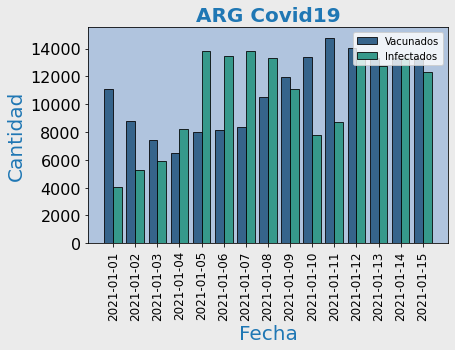

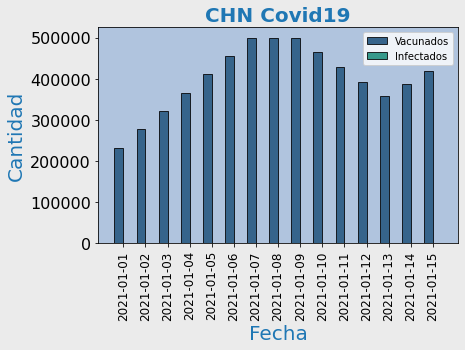

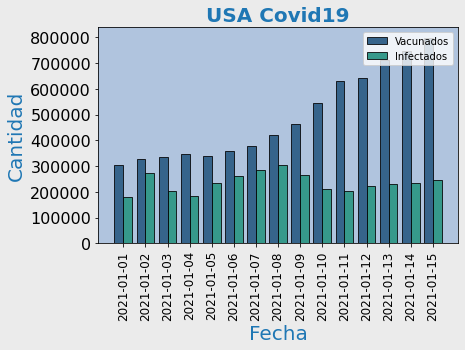

In [300]:
#Porbar funcion que plotea
#covid_merge_filt
#Chart1(covid_merge_filt)


Gráfico 1 – Comparación de infectados en países sudamericanos.

Ver los totales de vacunados para el rango de fechas y sacar conclusiones de los nuevos contagios y las nuevas muertes.

Gráfico 2 – Comparación Argentina vs Estados Unidos vs China.

Ver total de contagios y total de vacunados dentro del rango de fechas comparando Argentina contra los países más fuertes del mundo.

Gráfico 3 – Comparación de países en estaciones climáticas diferentes.

Ver nuevos contagiados para el rango de fechas y sacar conclusiones de los nuevos contagios con la premisa de que en países donde están transitando el invierno, la gente es más propensa a contagiarse.

Gráfico 4 – Comparación de países representativos por continente.

Seleccionando un país representativo por continente, hacer una comparación de total de vacunados para poder sacar conclusiones del nivel socio-económico influye en la vacunación de la población.



## Limpieza de datos

In [ ]:
# Ingrese código aquí

In [ ]:
# Ingrese código aquí

In [ ]:
# Ingrese código aquí

## Transformación de datos

In [ ]:
# Ingrese código aquí

In [ ]:
# Ingrese código aquí

In [ ]:
# Ingrese código aquí

## Análisis y Visualizaciones

*Ingrese su análisis aquí*


In [ ]:
# Ingrese código aquí

In [ ]:
# Ingrese código aquí

In [ ]:
# Ingrese código aquí

## Conclusión

*Ingrese conclusión aquí*

In [ ]:
# Ingrese código aquí

## Almacenamiento de resultados

In [ ]:
# Ingrese código aquí